## MANALO, DENISE PATRICIA B.
<b>Section:</b> CpE 3201
<p><b>Course Code and Subject:</b> CpEE 402 Cognate/Elective Course </p>
<p><b>Date:</b> May 13, 2021 </p>

In this activity, we'll use the Kaggle House Prices: Advanced Regression Techniques database (available at https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data , that we did EDA, Exploratory Data Analysis and Visualization. This dataset is aimed toward solving a regression problem (that is, the target variable takes on a range of continuous values). In this activity, we will use decision trees, K-nearest neighbors, Random Forest, and gradient boosting algorithms to train individual regressors on the data. Then, we will build a stacked linear regression model that uses all these algorithms and compare the performance of each. We will use the mean absolute error (MAE) as the evaluation metric for this activity.

The steps to be performed are as follows:

## 1. Import the relevant libraries.

In [218]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

In [219]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

## Read and preprocess data

In [220]:
data = pd.read_csv('house_prices.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Preprocess the dataset to remove null values and one-hot encode categorical variables to prepare the data for modeling.

In [222]:
data=data.drop(["Id"],axis=1)

In [223]:
data.drop("Alley", axis=1, inplace=True)
data.drop("PoolQC", axis=1, inplace=True)
data.drop("MiscFeature", axis=1, inplace=True)
data.drop("Fence", axis=1, inplace=True)

In [224]:
num_col=data._get_numeric_data().columns.tolist()
num_col

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [225]:
cat_col=set(data.columns)-set(num_col)
cat_col

{'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'Neighborhood',
 'PavedDrive',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

In [227]:
for col in num_col:
    data[col].fillna(data[col].mean(),inplace=True)
for col in cat_col:
    data[col].fillna(data[col].mode()[0],inplace=True)
data_final=pd.get_dummies(data) 
data_final.shape

(1460, 276)

## Divide the dataset into train and validation DataFrames.

In [228]:
x=data_final.drop(["SalePrice"],axis=True)
y=data_final["SalePrice"]

In [229]:
x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=11)

## Initialize dictionaries in which to store the train and validation MAE values.

In [250]:
train_mae_values = {
    'dt':dt_mae_train,
    'gbr':gbr_mae_train,
    'knn':knn_mae_train,
    'lr':lr_mae_train,
    'rf':rf_mae_train   
}

val_mae_values = {
    'dt':dt_mae_val,
    'gbr':gbr_mae_val,
    'knn':knn_mae_val,
    'lr':lr_mae_val,
    'rf':rf_mae_val
}

## Train a decision tree model with the following hyperparameters and save the scores:

In [230]:
dt_params = {
    'criterion': 'mae',
    'min_samples_leaf': 10,
    'random_state': 11
}

#insert code here for modelling
dt = DecisionTreeRegressor(**dt_params)
dt.fit(x_train, y_train)
dt_preds_train = dt.predict(x_train)
dt_preds_val = dt.predict(x_val)

In [231]:
dt.score(x_train, y_train)

0.8566570066824335

In [232]:
dt_mae_train = mean_absolute_error(y_train,dt_preds_train)
dt_mae_val = mean_absolute_error(y_val,dt_preds_val)

In [252]:
print ('Decision Tree Model Scores: \n Mean Absolute Error on training data = {:.4f}\n Mean Absolute Error on validation data = {:.4f}'.format(
    dt_mae_train,
    dt_mae_val
))

Decision Tree Model Scores: 
 Mean Absolute Error on training data = 16982.2622
 Mean Absolute Error on validation data = 24276.8973


## Train a k-nearest neighbors model with the following hyperparameters and save the scores:

In [234]:
knn_params = {
    'n_neighbors': 5
}

#insert code here for modelling
knn = KNeighborsRegressor(**knn_params)
knn.fit(x_train, y_train)
knn_preds_train = knn.predict(x_train)
knn_preds_val = knn.predict(x_val)

In [235]:
knn_mae_train = mean_absolute_error(y_train,knn_preds_train)
knn_mae_val = mean_absolute_error(y_val,knn_preds_val)

In [253]:
print ('KNN Model Scores: \n Mean Absolute Error on training data = {:.4f}\n Mean Absolute Error on validation data = {:.4f}'.format(
    knn_mae_train,
    knn_mae_val
))

KNN Model Scores: 
 Mean Absolute Error on training data = 24116.0419
 Mean Absolute Error on validation data = 29812.0324


## Train a Random Forest model with the following hyperparameters and save the scores:

In [254]:
rf_params = {
    'n_estimators': 50,
    'criterion': 'mae',
    'max_features': 'sqrt',
    'min_samples_leaf': 10,
    'random_state': 11,
    'n_jobs': -1
}
#insert code here for modelling
rf = RandomForestRegressor(**rf_params)
rf.fit(x_train, y_train)
rf_preds_train = rf.predict(x_train)
rf_preds_val = rf.predict(x_val)

In [255]:
rf_mae_train = mean_absolute_error(y_train,rf_preds_train)
rf_mae_val = mean_absolute_error(y_val,rf_preds_val)

In [256]:
print ('Random Forest Model Scores: \n Mean Absolute Error on training data = {:.4f}\n Mean Absolute Error on validation data = {:.4f}'.format(
    rf_mae_train,
    rf_mae_val
))

Random Forest Model Scores: 
 Mean Absolute Error on training data = 20021.3430
 Mean Absolute Error on validation data = 22479.1794


## Train a gradient boosting model with the following hyperparameters and save the scores:

In [240]:
gbr_params = {
    'n_estimators': 50,
    'criterion': 'mae',
    'max_features': 'sqrt',
    'min_samples_leaf': 10,
    'random_state': 11
}
#insert code here for modelling
gbr = GradientBoostingRegressor(**gbr_params)
gbr.fit(x_train, y_train)
gbr_preds_train = gbr.predict(x_train)
gbr_preds_val = gbr.predict(x_val)

In [241]:
gbr_mae_train = mean_absolute_error(y_train,gbr_preds_train)
gbr_mae_val = mean_absolute_error(y_val,gbr_preds_val)

In [257]:
print ('Gradient Boosting Model Scores: \n Mean Absolute Error on training data = {:.4f}\n Mean Absolute Error on validation data = {:.4f}'.format(
    gbr_mae_train,
    gbr_mae_val
))

Gradient Boosting Model Scores: 
 Mean Absolute Error on training data = 16342.7164
 Mean Absolute Error on validation data = 19167.4943


## Prepare the training and validation datasets, with the four meta estimators having the same hyperparameters that were used in the previous steps.

In [243]:
x_train_with_metapreds = np.zeros((x_train.shape[0], x_train.shape[1]+4))
x_train_with_metapreds[:, :-4] = x_train
x_train_with_metapreds[:, -4:] = -1
print(x_train_with_metapreds)

[[ 5.0000e+01  5.0000e+01  6.0000e+03 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [ 6.0000e+01  8.5000e+01  1.0800e+04 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [ 3.0000e+01  6.0000e+01  8.9670e+03 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 ...
 [ 2.0000e+01  1.2400e+02  1.6158e+04 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [ 2.0000e+01  9.3000e+01  1.2085e+04 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [ 1.6000e+02  2.4000e+01  2.0160e+03 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]]


In [244]:
kf = KFold(n_splits=5)

for train_indices, val_indices in kf.split(x_train):
    kfold_x_train, kfold_x_val = x_train.iloc[train_indices], x_train.iloc[val_indices]
    kfold_y_train, kfold_y_val = y_train.iloc[train_indices], y_train.iloc[val_indices]
    
    dt = DecisionTreeRegressor(**dt_params)
    dt.fit(kfold_x_train, kfold_y_train)
    dt_pred = dt.predict(kfold_x_val)
    
    knn = KNeighborsRegressor(**knn_params)
    knn.fit(kfold_x_train, kfold_y_train)
    knn_pred = knn.predict(kfold_x_val)
    
    rf = RandomForestRegressor(**rf_params)
    rf.fit(kfold_x_train, kfold_y_train)
    rf_pred = rf.predict(kfold_x_val)
    
    gbr = GradientBoostingRegressor(**gbr_params)
    gbr.fit(kfold_x_train, kfold_y_train)
    gbr_pred = gbr.predict(kfold_x_val)
    
    x_train_with_metapreds[val_indices, -4] = dt_pred
    x_train_with_metapreds[val_indices, -3] = knn_pred
    x_train_with_metapreds[val_indices, -2] = rf_pred
    x_train_with_metapreds[val_indices, -1] = gbr_pred

In [245]:
x_val_with_metapreds = np.zeros((x_val.shape[0], x_val.shape[1]+4))
x_val_with_metapreds[:, :-4] = x_val
x_val_with_metapreds[:, -4:] = -1
print(x_val_with_metapreds)

[[ 4.5000e+01  5.5000e+01  4.3880e+03 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [ 2.0000e+01  8.0000e+01  9.6000e+03 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [ 3.0000e+01  5.0000e+01  5.3300e+03 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 ...
 [ 2.0000e+01  8.1000e+01  1.1216e+04 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [ 1.6000e+02  2.1000e+01  1.6800e+03 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]
 [ 2.0000e+01  1.1400e+02  1.0357e+04 ... -1.0000e+00 -1.0000e+00
  -1.0000e+00]]


In [246]:
    dt = DecisionTreeRegressor(**dt_params)
    dt.fit(x_train, y_train)
    dt_pred = dt.predict(x_val)

    knn = KNeighborsRegressor(**knn_params)
    knn.fit(x_train, y_train)
    knn_pred = knn.predict(x_val)

    rf = RandomForestRegressor(**rf_params)
    rf.fit(x_train, y_train)
    rf_pred = rf.predict(x_val)

    gbr = GradientBoostingRegressor(**gbr_params)
    gbr.fit(x_train, y_train)
    gbr_pred = gbr.predict(x_val)
    
    x_val_with_metapreds[:, -4] = dt_pred
    x_val_with_metapreds[:, -3] = knn_pred
    x_val_with_metapreds[:, -2] = rf_pred
    x_val_with_metapreds[:, -1] = gbr_pred

## Train a linear regression model as the stacked model.

In [247]:
lr = LinearRegression()
lr.fit(x_train_with_metapreds, y_train)
lr_preds_train = lr.predict(x_train_with_metapreds)
lr_preds_val = lr.predict(x_val_with_metapreds)

In [248]:
lr_mae_train = mean_absolute_error(y_train,lr_preds_train)
lr_mae_val = mean_absolute_error(y_val,lr_preds_val)

In [258]:
print ('Linear Regression Model Scores: \n Mean Absolute Error on training data = {:.4f}\n Mean Absolute Error on validation data = {:.4f}'.format(
    lr_mae_train,
    lr_mae_val
))

Linear Regression Model Scores: 
 Mean Absolute Error on training data = 11800.3437
 Mean Absolute Error on validation data = 18202.2126


## Visualize the train and validation errors for each individual model and the stacked model.

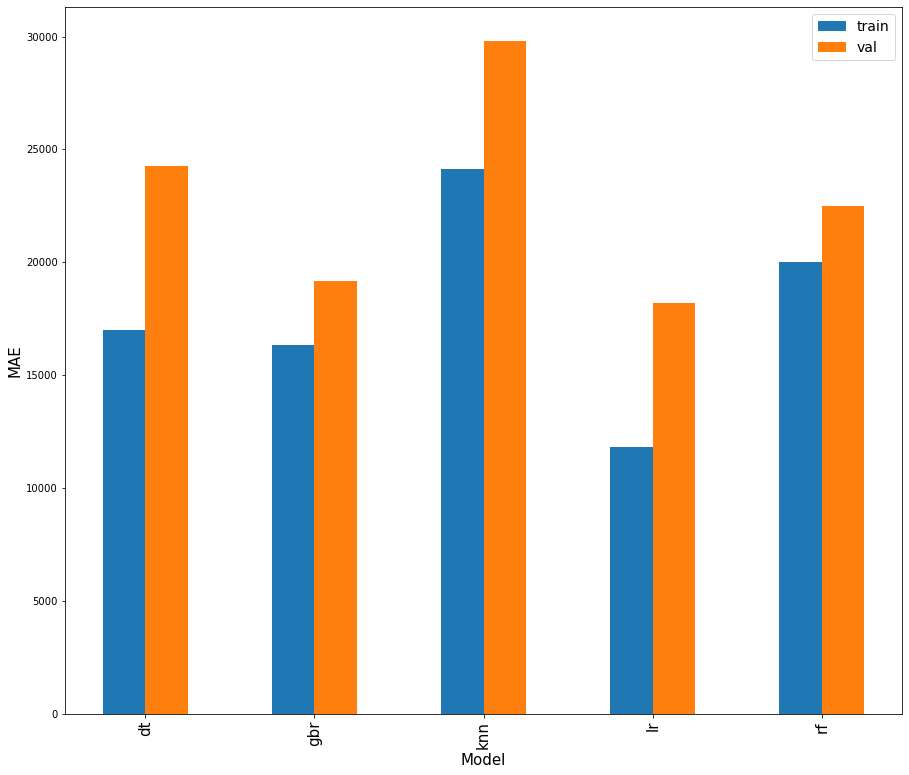

In [251]:
index = np.arange(5)
bar_width = 0.25

fig, ax = plt.subplots(figsize=(15,13))

names = list(train_mae_values.keys())
train_values = list(train_mae_values.values())
val_values = list(val_mae_values.values())

trainbar = ax.bar(index, train_values, bar_width,
                label="train")

val = ax.bar(index+bar_width,val_values,
                 bar_width, label="val")

ax.set_xlabel('Model', fontsize = 15)
ax.set_ylabel('MAE', fontsize = 15)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(names, fontsize = 15)
ax.legend(fontsize = 14)
plt.xticks(rotation = 90)

plt.show()

Reference Result/Output:

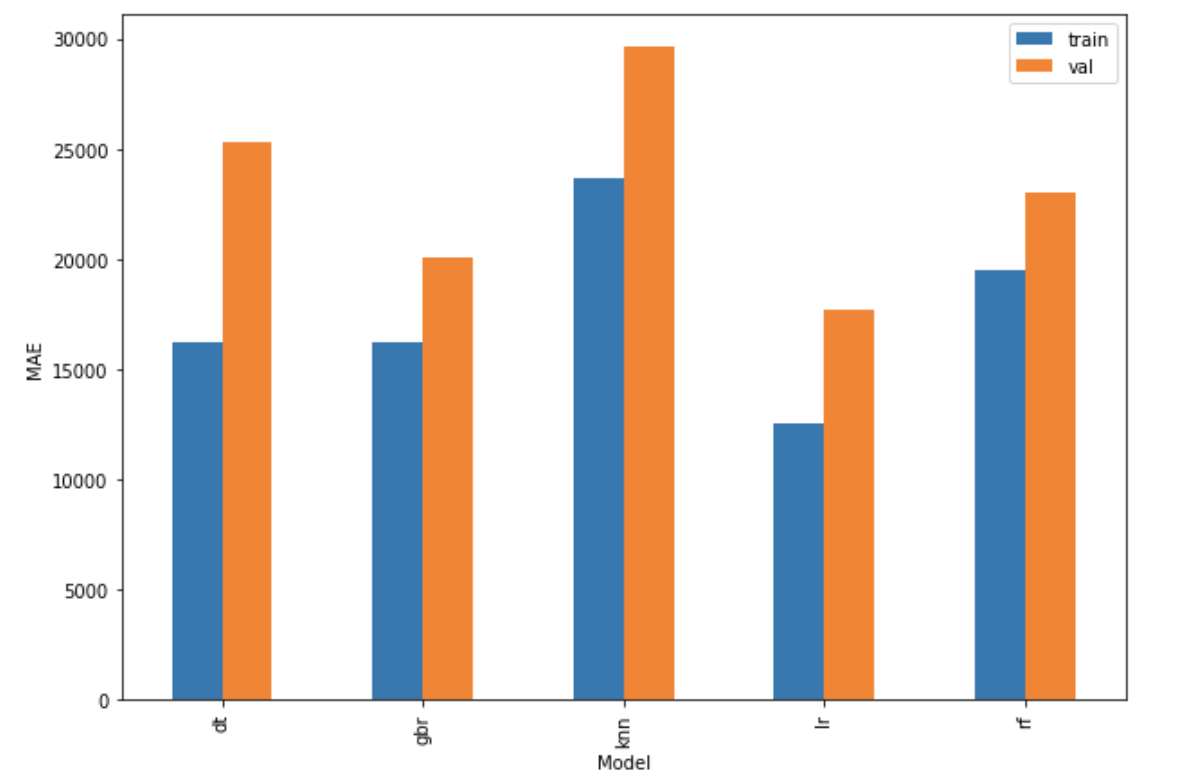